## 2. Feladatsor (interpoláció: Hermite, Spline)

#### 1. Feladat

Legyen $f$ kellően sima függvény. Melyik a legjobb nulladfokú polinom közelítése a függvénynek egy pontban, mely benne van az értelmezési tartományában? A legjobb elsőfokú? A legjobb $k$-adfokú?

In [1]:
# Taylor-polinom

----------
#### Hermite-interpoláció

Tegyük fel, hogy $x_0, \ldots, x_{n}$ alappontokonban rendelkezésünkre állnak $y_0, \ldots, y_{n+1}$ függvényértékek és $y_0', \ldots, y_{n+1}'$ deriváltértékek.

Konstruáljunk olyan (legfeljebb) $(2(n+1) - 1)$-edfokú polinomot, mely, illetve melynek deriváltja az alappontokban a megfelelő értékeket veszi fel!

**Ötlet:** csináljuk meg először egy ponttal.
<details>
<summary></summary>
$$x \mapsto y_0 + y_0'(x- x_0)$$
</details>

**Ötlet:** ha $x_0, \ldots, x_{n-1}$-re már van egy megfelelő, $p_{2n-1}$ polinomunk, akkor keressük az új, $p_{2n+1}$ polinomot a következő alakban:

$$p_{2n+1} = p_{2n-1} + q_{2n+1},$$

ahol $q_{2n+1}$ egy olyan polinom, melynek 0. és 1. deriváltjai az első $n$ pontban mind nullák, és foka kettővel nagyobb.

**Ötlet:** Hogyan tudnánk ilyen $q_{2n+1}$ polinomot konstruálni a $w_{n}(x) = (x- x_0)(x-x_1) \cdots (x - x_{n-1})$ polinomból?

<details>
<summary></summary>
    Legyen
    $$ q_{2n+1}(x) = w_{n}^2(x)( b_{2n+1} + a_{2n+1}(x-x_{n})).$$
</details>

**Ötlet:** Az ismeretlen együtthatók meghatározhatók a két új adat behelyettesítésével.

Először:
$$ y_{n} = p_{2n-1}(x_{n}) + q_{2n+1}(x_{n}) $$
<details>
<summary></summary>
    Innen: $$ b_{2n+1} = \frac{y_n - p_{2n-1}(x_n)}{w_n^2(x_n)} $$
</details>
Másodszor:
$$ y_{n}' = p_{2n-1}'(x_{n}) + q_{2n+1}'(x_{n}) $$
<details>
<summary></summary>
    Deriválással látható, hogy 
$$ q_{2n+1}'(x) = 2w_{n}'(x)w_n(x)( b_{2n+1} + a_{2n+1}(x-x_{n})) + w_n^2(x)a_{2n+1},$$
azaz
$$ p_{2n+1}'(x_n) = p_{2n}'(x_n) + 2w_{n}'(x_n)w_n(x_n)b_{2n+1} + w_n^2(x_n)a_{2n+1},$$
ahonnan
$$
a_{2n+1} = \frac{y_n' - p_{2n}'(x_n) - 2w_{n}'(x_n)w_n(x_n)b_{2n+1} }{w_n^2(x_n)}.
$$
</details>

#### 2. Feladat
Írjuk fel Hermite-interpoláció ötletével azt a polinomot, amire az $x_0 = -1$ pontban $y_0 = 1$, $y_0' = -2$ és amire a $x_1 = 0$ pontban $y_1 = 0$. Hogyan változik a polinom, ha azt is tudjuk, hogy $y_1' = 0$?

In [2]:
# x_0-beli adatok alapjan: 1 - 2*(x + 1)
# x_1-beli Hermite-alak:   1 - 2*(x+1) + (x+1)^2*(b + ax)
#                        
#          y_1 alapjan:    0 = y_1 = 1 - 2*(0 + 1) + 1*b = 1 - 2 + b
#                          b = y_1 + 1
#                          tehat 1 - 2*(x+1) + (x+1)^2 jo
#          y_1' alapjan:
#                          0 = y_1' = -2 + 2*1*(1 + a*0) + 1^2*a
#                          a = y_1' = 0
#                          tehat 1 - 2*(x+1) + (x+1)^2*(1 + 0*x) jo

#### 3. Feladat
Írjunk programot, ami adott $x$ és $y, y'$ -pontokat és az ott felveendő értékeket, illetve deriváltakat tartalmazó- vektorokra Hermite-féle interpolációs polinomot illeszt, majd egy további $z$ pontban kiértékeli azt.

In [3]:
using LinearAlgebra

# a poly_fit_newton-os kod nyomaban:
function poly_fit_hermite(xs, ys, ys_)
    # xs: alappontok, n+1 hosszú oszlopvektor
    # ys: alappontokba óhajtott értékek, n+1 hosszú oszlopvektor
    # ys_: alappontokba óhajtott deriváltértékek, n+1 hosszú oszlopvektor

    function w(k)
        if k == 1
            return z -> 1
        end
        
        return z -> prod(z .- xs[1:k-1])
    end
    
    function dw(k)
        if k == 1
            return z -> 0
        end
        
        A(z) = z.*ones(length(xs[1:k-1]))' .- xs[1:k-1]
        return z -> sum(prod(A(z) - diagm(diag(A(z))) + I, dims=1))
    end

    function p(k)
        if k == 0
            return z -> 0
        end
        
        return z -> p(k-1)(z) + (w(k)(z))^2*(a(k)*(z-xs[k]) + b(k))
    end
        
    function dp(k)
        if k == 0
            return z -> 0
        end
           
        return z -> dp(k-1)(z) + 2*dw(k)(z)*w(k)(z)*(a(k)*(z - xs[k]) + b(k)) + w(k)(z)^2*(a(k))
    end

    function b(k)
        if k == 1
            return ys[1]
        end
        
        return (ys[k] - p(k-1)(xs[k]))/(w(k)(xs[k]))^2
    end

    function a(k)
        if k == 1
            return ys_[1]
        end
        
        return (ys_[k] - dp(k-1)(xs[k]) - 2*dw(k)(xs[k])*(w(k)(xs[k]))*b(k))/(w(k)(xs[k]))^2
    end
    
    n = min(min(length(xs), length(ys)), length(ys_))
    return p(n)
end

poly_fit_hermite (generic function with 1 method)

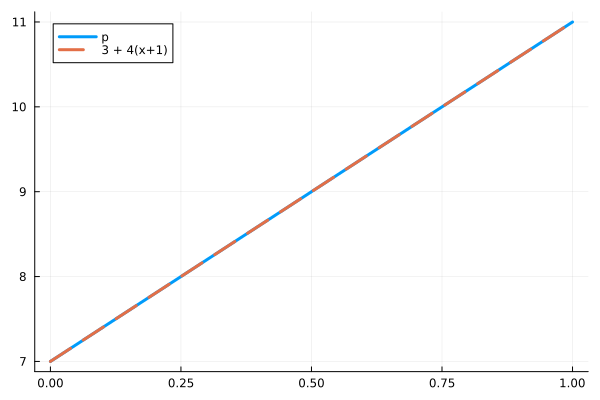

In [4]:
using Plots

plot()
plot!(poly_fit_hermite([-1], [3], [4]), label="p", lw=3)
plot!(z -> 3 + 4*(z+1), label="3 + 4(x+1)", ls=:dash, lw=3)

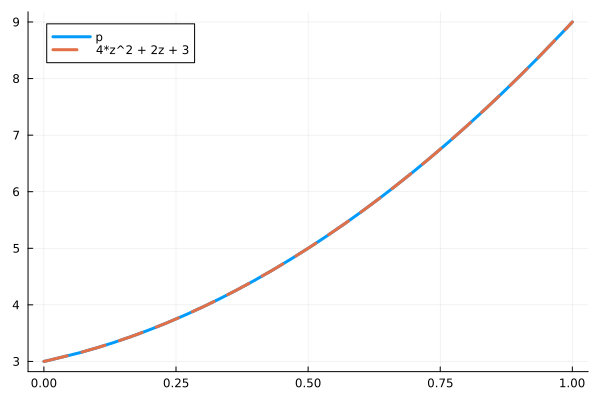

In [5]:
plot()
plot!(poly_fit_hermite([-1, 1], [5, 9], [-6,10]), label="p", lw=3)
plot!(z -> 4*z^2 + 2z + 3, label="4*z^2 + 2z + 3", lw=3, ls=:dash)

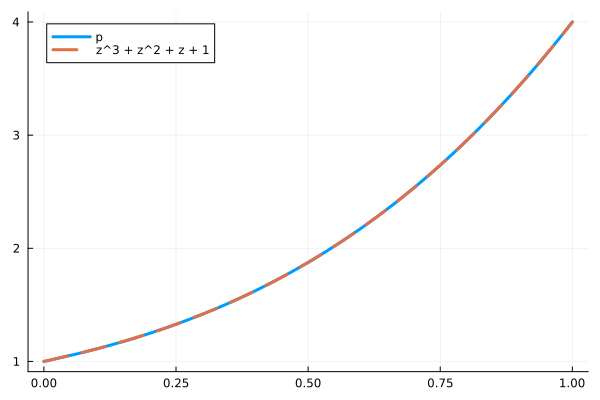

In [6]:
plot()
plot!(poly_fit_hermite([-1, 1], [0, 4], [2, 6]), label="p", lw=3)
plot!(z -> z^3 + z^2 + z + 1, label="z^3 + z^2 + z + 1", lw=3, ls=:dash)

-----

#### Spline

Adott $[a,b]$ intervallumon szakaszonként $n$-edfokú polinomokból álló, $(n-1)$-szer folytonosan differenciálható függvényt spline-nak nevezünk. Az $(n=3)$ esetet köbös **spline**-nak.

Paraméterezzünk egy ilyet. Legyenek $x_j$ rácspontok $(j=0 \ldots n)$, ekkor olyan harmadfokú polinomot keresünk, ami a végpontokban adott értékeket vesz fel. Nézzük az $[x_j, x_{j+1}]$ intervallumot és használjuk az eddigi ötleteinket egy ilyen polinom paraméterezésére.
$$
    s_j(x) = y_j + \frac{y_{j+1} - y_j}{x_{j+1} - x_j} (x - x_j) + (x-x_j)(x-x_{j+1})(a_j(x-x_j) + b_j) = l_j(x) + (x-x_j)(x-x_{j+1})e_j(x) = (l_j + w_j e_j)(x)
$$
Ahol $e_j, l_j$ lineáris, $w_j$ pedig kvadratikus polinom, és az utóbbi kettő együtthatóit az $y_j$ értékek, illetve az $x_j$ alappontok meghatározzák.

<details>
<summary>Csak sajat felelossegre</summary>

Minden pontban, ami nem végpont ($x_j, j = 1 \dots n-1$) adott két csatlakozási feltételünk. Ezek biztosításához szükségünk lesz a polinomok első két deriváltjára, melyek rendre
$$s_j' = l_{j}' + w_j'e_j +w_j e_j'$$
és
$$s_j'' = l_j'' + w_j''e_j + 2w_j'e_j' + w_je_j''.$$

Mivel a feltételeink azt mondják, hogy minden ilyen $j$ esetén
$$s_j'(x_j) = s_{j-1}'(x_j) \qquad \text{és} \qquad s_j''(x_j) = s_{j-1}''(x_j)$$
teljesül, ezért
először is
$$ \left(l_{j}' + w_j'e_j +w_j e_j'\right)(x_j) = \left(l_{j-1}' + w_{j-1}'e_{j-1} +w_{j-1} e_{j-1}'\right)(x_{j}),$$
amiből a tagok és tényezők fokszámát kihasználva, behelyettesítéssel kapjuk, hogy
$$ 
 \frac{y_{j+1} - y_j}{x_{j+1} - x_j} + (x_j - x_{j+1})b_j + 0 =   \frac{y_{j} - y_{j-1}}{x_{j} - x_{j-1}} + (x_j - x_{j-1})( a_{j-1}(x_j - x_{j-1}) + b_{j-1}) + 0;
$$
másodszor pedig, kihasználva, hogy 
$$s_j'' = l_j'' + w_j''e_j + 2w_j'e_j' + w_je_j'' = 2e_j + 2w_j'e_j',$$
adódik az egyenletünk
$$ (e_j + w_j'e_j')(x_j) = (e_{j-1} + w_{j-1}'e_{j-1}')(x_j)$$
alakja, mely behelyettesítés után az
$$
    b_j + (x_j - x_{j+1})a_j = a_{j-1}(x_j - x_{j-1}) + b_{j-1} + (x_j - x_{j-1})a_{j-1}
$$
alakot ölti. Ha $\nu_j = x_{j+1} - x_{j}$, és $\delta_j = \frac{y_{j+1} - y_{j}}{\nu_j}$, akkor ezek az egyenletek rendre
$$
 \delta_{j} - \nu_{j}b_j =   \delta_{j-1} + a_{j-1}\nu_{j-1}^2 + b_{j-1}\nu_{j-1}
$$
és
$$
 b_j - \nu_{j} a_j = 2a_{j-1}\nu_{j-1} + b_{j-1},
$$
alakúak, azaz lineárisak az $a_k, b_k$ vátozókban.

Próbáljuk még egyszerűsíteni az életünket, legyen $\gamma_{j-1} = \frac{\delta_j - \delta_{j-1}}{\nu_{j-1}}$, $c_j = \nu_j a_j$.
Ekkor
$$
  c_{j-1} = \gamma_{j-1} - \frac{\nu_{j}}{\nu_{j-1}}b_j - b_{j-1} \qquad\qquad (j=1..n-1)
$$
és
$$
 b_j - b_{j-1} = c_j + 2c_{j-1}. \qquad\qquad (j=1..n-1)
$$
Tehát, egyrészt 
$$
 b_{n-1} - b_{n-2} = c_{n-1} + 2c_{n-2},
$$
másrészt
$$
 b_j - b_{j-1} = 
 \left(\gamma_{j} - \frac{\nu_{j+1}}{\nu_{j}}b_{j+1} - b_{j}\right)
 + 2\left(\gamma_{j-1} - \frac{\nu_{j}}{\nu_{j-1}}b_j - b_{j-1}\right), \qquad\qquad (j=1..n-2)
$$
azaz
$$
 \frac{\nu_{j+1}}{\nu_{j}}b_{j+1} + 2\left(1 + \frac{\nu_{j}}{\nu_{j-1}}\right) b_{j} + b_{j-1} = \gamma_j + 2\gamma_{j-1}. \qquad\qquad (j=1..n-2)
$$
Vagyis ha ismerjük a $b_0, \ldots, b_{n-1}$ értékeket, akkor azokból tudjuk a $c_0, \ldots, c_{n-2}$ értékeket is, amikkel pedig már a $c_{n-1}$-et is. Tehát a $c_j$-k ilyenkor megvannak.

Az $n$ darab $b_j$ meghatározására maradt $(n-2)$ egyenlet. Ha ezek mellett adott $b_0$ és $b_{n-1}$, akkor a többi $b_j$ is megkapható.
</details>

----------

#### Köbös, természetes spline $3$ egymást egységnyi távolságban követő alappontra

Adott $x_0, x_1, x_2$ pontokra és $y_0, y_1, y_2$ értékekre kereshetjük a két részből álló spline formuláját az alábbi alakban:

$$[x_0, x_1] \ni x \quad \mapsto \quad p_0(x) =  y_0 + \delta_{0,1} (x-x_0) + (x-x_0)(x - x_1)(a(x-x_0) + b)$$
és
$$[x_1, x_2] \ni x \quad \mapsto \quad p_1(x) =  y_2 + \delta_{2,1} (x-x_2) + (x-x_1)(x - x_2)(c(x-x_2) + d).$$

Tehát ismeretlenek: $a,b,c,d$. A csatlakozási pont az $x_1$. Számoljuk ki az első két deriváltat mindkét polinomra:

$$ p_0'(x) = \delta_{0,1} + (x - x_0 + x - x_1)(a(x-x_0) + b) + (x-x_0)(x-x_1)a $$
és
$$ p_0''(x)  = 2(a(x-x_0) + b) + 2a(x-x_0 + x-x_1), $$
illetve analóg módon
$$ p_1'(x) = \delta_{1,2} + (x - x_1 + x - x_2)(c(x-x_2) + d) + (x-x_1)(x-x_2)c $$
és
$$ p_1''(x)  = 2(c(x-x_2) + d) + 2c(x-x_1 + x-x_2). $$

**Tegyük fel**, hogy $x_{j+1} - x_j = 1$ minden $j$-re. Behelyettesítve az $x_1$ értéket az első deriváltakba, adódik, hogy
$$\delta_{0,1} + (1 + 0)(a\cdot 1 + b) + 1\cdot 0 \cdot a = \delta_{1,2} + (0 - 1)(c(-1) + d) + 0,$$

azaz $$a + b = \delta_{1,2} - \delta_{0,1} + c - d.$$
Behelyettesítve az $x_1$ értéket a második deriváltakba, adódik, hogy 
$$ 2(a + b) + 2a(1 + 0) = 2(c(-1) + d) + 2c(-1), $$
azaz
$$ 4a + 2b = 2d - 4c. $$

**Tegyük fel**, hogy $p_0''(x_0) = 0 = p_1''(x_2)$.
Ekkor teljesül, hogy
$$ 2b + 2a(-1) = 0 =  2d + 2c, $$
azaz $b = a, c = -d$, amivel a deriváltak $x_1$-beli egyenlőségét leíró egyenletek alakja a következőkre egyszerűsödik:
$$2a = \delta_{1,2} - \delta_{0,1} + 2c $$
és
$$ 6a = -6c.$$
Amiből tehát adott $a$ esetén $b = a, c=-a, d=a$ és 
$$
a = \frac{\delta_{1,2} - \delta_{0,1}}{4}.
$$

#### 4. Feladat
Írjuk fel az $(-1, 0, 1)$ pontokhoz és $(1, 0, 1)$ értékekhez tartozó köbös spline-okat definiáló egyenleteket. Majd számoljuk ki, hogy milyen polinomokat kapunk akkor, ha a végpontokban a második deriváltat $0$-nak írjuk elő.

In [7]:
# [-1, 0]-n a 0-ban felvett (0., 1., 2.) derivaltak egyezosege alapjan, ismerve a 0. derivalt erteket
# p(x) = 0 + y_0'x + y_0'' x^2/2 + c x^3
# [0, 1]-en a 0-ban felvett (0., 1., 2.) derivaltak egyezosege alapjan, ismerve a 0. derivalt erteket
# q(x) = 0 + y_0'x + y_0'' x^2/2 + d x^3

# masodik derivalt a vegpontokban nulla, tehat
# 0 = p''(-1) = y_0'' + 6c(-1)
# 0 = q''(1) = y_0'' + 6d

# speciel d = -c, y_0'' = 6c

# vegpontokban felvett ertekek alapjan:
# 1 = p(-1) = y_0'(-1) + y_0''/2 - c = -y_0' + 3c -c
# 1 = q(1) = y_0' + y_0''/2 + d = y_0' + 3c  -c
# 
# osszeadva ezeket
# 2 = 4c
# c = 1/2
# 
# tehat y_0'' = 3
#       y_0' = 0

# innen:
#  p(x) = 3/2 x^2 + x^3/2
#  q(x) = 3/2 x^2 - x^3/2
# 
# Amikre tehat teljesul minden feltetelunk, nevezetesen:
#
# Fuggvenyertekek eloirtsaga:
# p(-1) = 1
# q(1) = 1
# p(0) = q(0) = 0
# Derivaltak egyezosege:
# p'(0) = q'(0)
# p''(0) = q''(0)
# Vegpontbeli 2. derivaltak nullasaga:
# p''(-1) = 0
# q''(1) = 0

#### 5. Feladat
Írjunk programot, ami adott $x$ és $y$ -pontokat és az ott felveendő értékeket tartalmazó- **három hosszú** vektorokra köbös spline-ot illeszt, a "természetes" (végpontokban eltűnő második derivált) peremfeltétellel. Feltehetjük, hogy a pontok egymást egyenlő távolságban követik, hogy könnyebb legyen leírni a megoldást.

In [8]:
# Az x_0-h, x_0, x_0 + h pontok helyett dolgozzunk (-1, 0, 1)-gyel, mint az előző feladatban
#
# Ha megvan az ezekhez az alappontokhoz és az eredeti értékekhez tartozó p és q polinom, akkor
# x -> p((x-x_0)/h)
# x -> q((x-x_0)/h)
# jó polinomok lesznek! :)

function spline33(xs, ys)
    h = (xs[2] - xs[1] + xs[3] - xs[2])/2

    c = (ys[1] - ys[2] + ys[3] - ys[2])/4
    y0__ = 6*c
    y0_ = ys[3] - ys[2] - 2*c
    y0 = ys[2]

    function p(z)
        return y0 + y0_*z + y0__*z^2/2 + c*z^3
    end
    function q(z)
        return y0 + y0_*z + y0__*z^2/2 - c*z^3
    end


    function sp(z)
        w = (z-xs[2])/h
        if w <= 0
            return p(w)
        end

        return q(w)
    end
    
    return sp
end

spline33 (generic function with 1 method)

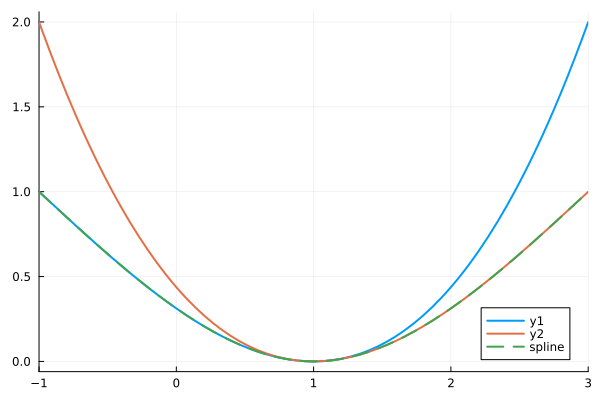

In [9]:
plot(xlims=(-1, 3))
plot!(z -> ((z-1)/2)^2*3/2 + ((z-1)/2)^3/2, lw=2)
plot!(z -> ((z-1)/2)^2*3/2 - ((z-1)/2)^3/2, lw=2)
plot!(spline33(2 .*[-1, 0 ,1] .+ 1, [1, 0, 1]), label="spline", lw=2, ls=:dash)

#### 6. Feladat*
Írjunk programot, ami adott $x$ és $y$ -pontokat és az ott felveendő értékeket tartalmazó- vektorokra köbös spline-ot illeszt, a kedvenc peremfeltételünkkel.

In [10]:
# tul hosszu, legyen 'szorgalmi', vagy egy projekt resze